### Importação dos Dados e Visualização do Dataset

1. Importamos as bibliotecas pandas e os para manipulação de dados e interação com o sistema operacional.
2. Definimos o diretório onde estão localizados os arquivos de dados.
3. Criamos uma lista vazia para armazenar os dataframes.
4. Criamos um mapeamento entre os nomes dos arquivos de dados e os tipos de texto correspondentes.
5. Percorremos os arquivos na pasta de dados, selecionando apenas aqueles com extensão `.csv`.
6. Para cada arquivo:
   - Leemos o arquivo CSV e o transformamos em um dataframe.
   - Se o arquivo estiver mapeado, adicionamos uma coluna `type_text` ao dataframe com o valor correspondente ao tipo de texto.
   - Convertemos as colunas numéricas para o tipo de dados numérico inteiro.
   - Adicionamos uma coluna `type_text_label` ao dataframe, contendo o nome do arquivo sem a extensão `.csv`.
   - Armazenamos o dataframe resultante na lista.
7. Concatenamos todos os dataframes da lista em um único dataframe final.
8. Exibimos as primeiras linhas do dataframe final para visualizar os dados importados e processados.

Esses passos resumidos permitem importar e processar dados de vários arquivos CSV, adicionando informações extras aos dataframes e combinando-os em um único conjunto de dados para análise posterior.

In [2]:
import pandas as pd
import os

pasta_dados = 'dados'

dataframes = []

mapeamento_arquivos = {
    'aggression.csv': 1,
    'attack.csv': 2,
    'racism.csv': 3,
    'sexism.csv': 4,
    'toxicity.csv': 5
}


for arquivo in os.listdir(pasta_dados):
    if arquivo.endswith('.csv'):
        caminho_arquivo = os.path.join(pasta_dados, arquivo)
        df = pd.read_csv(caminho_arquivo)
        
        if arquivo in mapeamento_arquivos:
            tipo_texto = mapeamento_arquivos[arquivo]
            df['type_text'] = tipo_texto
        
        colunas_numericas = df.select_dtypes(include='number').columns
        df[colunas_numericas] = df[colunas_numericas].apply(pd.to_numeric, downcast='integer', errors='coerce')
        
        df['type_text_label'] = arquivo.replace(".csv", "")
        dataframes.append(df)

df_final = pd.concat(dataframes)
df_final.head()

index                                               Text  ed_label_0  \
0     0  `- This is not ``creative``.  Those are the di...    0.900000   
1     1  `  :: the term ``standard model`` is itself le...    1.000000   
2     2    True or false, the situation as of March 200...    1.000000   
3     3   Next, maybe you could work on being less cond...    0.555556   
4     4               This page will need disambiguation.     1.000000   

   ed_label_1  oh_label  type_text type_text_label   id Annotation  
0    0.100000       0.0          1      aggression  NaN        NaN  
1    0.000000       0.0          1      aggression  NaN        NaN  
2    0.000000       0.0          1      aggression  NaN        NaN  
3    0.444444       0.0          1      aggression  NaN        NaN  
4    0.000000       0.0          1      aggression  NaN        NaN

### Visualização da Quantidade de Itens por Classe

1. Importamos a biblioteca `matplotlib.pyplot` com o nome `plt` para criar visualizações gráficas.
2. Definimos uma função chamada `plot_class_counts` que recebe um dataset como parâmetro.
3. Dentro da função:
   - Filtramos os dados do dataset para obter um subconjunto onde o valor da coluna `oh_label` seja igual a 1. Armazenamos esse subconjunto no dataframe `df_oh_label_1`.
   - Filtramos os dados do dataset para obter um subconjunto onde o valor da coluna `oh_label` seja igual a 0. Armazenamos esse subconjunto no dataframe `df_oh_label_0`.
   - Contamos a quantidade de itens por classe nos dataframes filtrados usando o método `value_counts()` na coluna `type_text_label`. Armazenamos essas contagens em `count_by_class_1` e `count_by_class_0` respectivamente.
   - Criamos uma figura com dois subplots usando `plt.subplots(nrows=1, ncols=2, figsize=(12, 6))`.
   - No primeiro subplot (`axes[0]`):
     - Plotamos um gráfico de barras com as classes no eixo x e as quantidades de itens no eixo y usando `axes[0].bar(count_by_class_1.index, count_by_class_1)`.
     - Definimos os rótulos dos eixos x e y, bem como o título do gráfico.
     - Giramos os rótulos do eixo x em 45 graus para melhor legibilidade usando `axes[0].tick_params(axis='x', rotation=45)`.
     - Adicionamos as quantidades acima de cada barra do gráfico usando um loop `for` e o método `text`.
   - No segundo subplot (`axes[1]`), seguimos o mesmo procedimento para a classe `oh_label` igual a 0.
   - Ajustamos o layout dos subplots para evitar sobreposição de elementos usando `plt.tight_layout()`.
   - Exibimos os gráficos lado a lado usando `plt.show()`.

Esses passos resumidos permitem criar uma visualização que mostra a quantidade de itens por classe (representadas pelos rótulos) em dois subplots, um para a classe `oh_label` igual a 1 e outro para a classe `oh_label` igual a 0. O gráfico de barras apresenta as contagens de itens em cada classe, com as quantidades exibidas acima de cada barra.


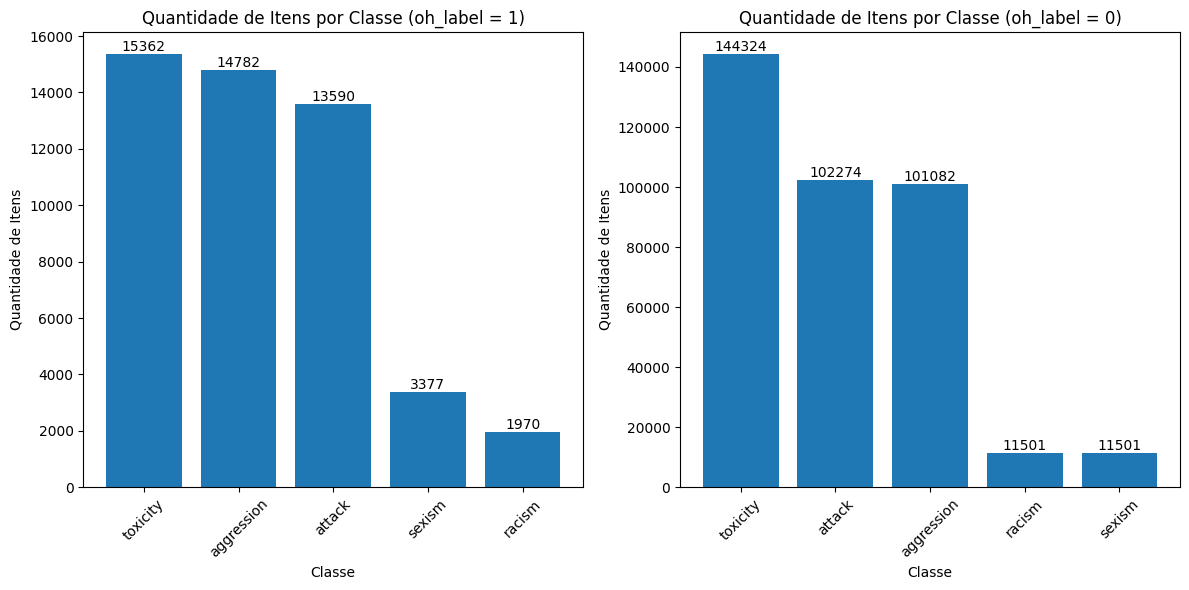

In [3]:
import matplotlib.pyplot as plt

def plot_class_counts(dataset):
    # Filtrar os dados para oh_label igual a 1
    df_oh_label_1 = dataset[dataset['oh_label'] == 1]

    # Filtrar os dados para oh_label igual a 0
    df_oh_label_0 = dataset[dataset['oh_label'] == 0]

    # Agrupar e contar a quantidade de itens por classe em cada DataFrame filtrado
    count_by_class_1 = df_oh_label_1['type_text_label'].value_counts()
    count_by_class_0 = df_oh_label_0['type_text_label'].value_counts()

    # Criar uma figura com dois subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Gráfico para oh_label igual a 1
    axes[0].bar(count_by_class_1.index, count_by_class_1)
    axes[0].set_xlabel('Classe')
    axes[0].set_ylabel('Quantidade de Itens')
    axes[0].set_title('Quantidade de Itens por Classe (oh_label = 1)')
    axes[0].tick_params(axis='x', rotation=45)

    # Adicionar a quantidade acima de cada barra no gráfico para oh_label igual a 1
    for i, v in enumerate(count_by_class_1):
        axes[0].text(i, v, str(v), ha='center', va='bottom')

    # Gráfico para oh_label igual a 0
    axes[1].bar(count_by_class_0.index, count_by_class_0)
    axes[1].set_xlabel('Classe')
    axes[1].set_ylabel('Quantidade de Itens')
    axes[1].set_title('Quantidade de Itens por Classe (oh_label = 0)')
    axes[1].tick_params(axis='x', rotation=45)

    # Adicionar a quantidade acima de cada barra no gráfico para oh_label igual a 0
    for i, v in enumerate(count_by_class_0):
        axes[1].text(i, v, str(v), ha='center', va='bottom')

    # Ajustar o layout dos subplots
    plt.tight_layout()

    # Exibir os gráficos lado a lado
    plt.show()

plot_class_counts(df_final)

### Tratamento de Variáveis Nulas e Balanceamento de Dados

1. Removemos os registros nulos ou sem valor nas colunas 'Text' e 'oh_label' do dataframe `df_final` e armazenamos o resultado no dataframe `df_filtered`.
2. Utilizamos o método `groupby` para agrupar os dados em `df_filtered` pela combinação das colunas 'oh_label' e 'type_text_label' e contamos a quantidade de itens em cada grupo. Armazenamos essas contagens no dataframe `grouped_counts`.
3. Filtramos apenas os grupos onde o valor da coluna 'oh_label' é igual a 1, criando um filtro booleano e selecionando as linhas correspondentes em `grouped_counts`. Armazenamos o resultado de filtro em `filtro` e atualizamos `grouped_counts` com os grupos filtrados.
4. Criamos um novo dataframe vazio chamado `df_new`.
5. Iteramos sobre cada grupo em `grouped_counts` usando um loop `for`.
6. Para cada grupo, obtemos os valores de 'oh_label' e 'type_text_label' e os armazenamos nas variáveis `oh_label` e `type_text_label` respectivamente.
7. Criamos filtros para selecionar os registros correspondentes à presença ou ausência de bullying, com base nos valores de 'oh_label' e 'type_text_label'. Armazenamos esses filtros em `filter_yes_bullying` e `filter_not_bullying`.
8. Obtemos as contagens de itens de bullying e não bullying para o grupo atual usando os filtros e selecionando a coluna 'count' em `count`. Armazenamos as contagens em `count_yes_bullying` e `count_not_bullying`.
9. Amostramos aleatoriamente `count_yes_bullying` registros de bullying e `count_not_bullying` registros sem bullying do dataframe `df_filtered` usando os filtros. Armazenamos essas amostras em `group_yes_bullying` e `group_not_bullying`.
10. Concatenamos os dataframes `group_yes_bullying` e `group_not_bullying` ao dataframe `df_new`.
11. Chamamos a função `plot_class_counts` passando o dataframe `df_new` como argumento para visualizar a quantidade de itens por classe.

Esses passos resumidos envolvem o tratamento de variáveis nulas, a contagem e agrupamento de itens por classe, e o balanceamento dos dados através da amostragem aleatória para criar o dataframe `df_new`. Em seguida, a função `plot_class_counts` é utilizada para visualizar a quantidade de itens por classe nesse novo dataframe.


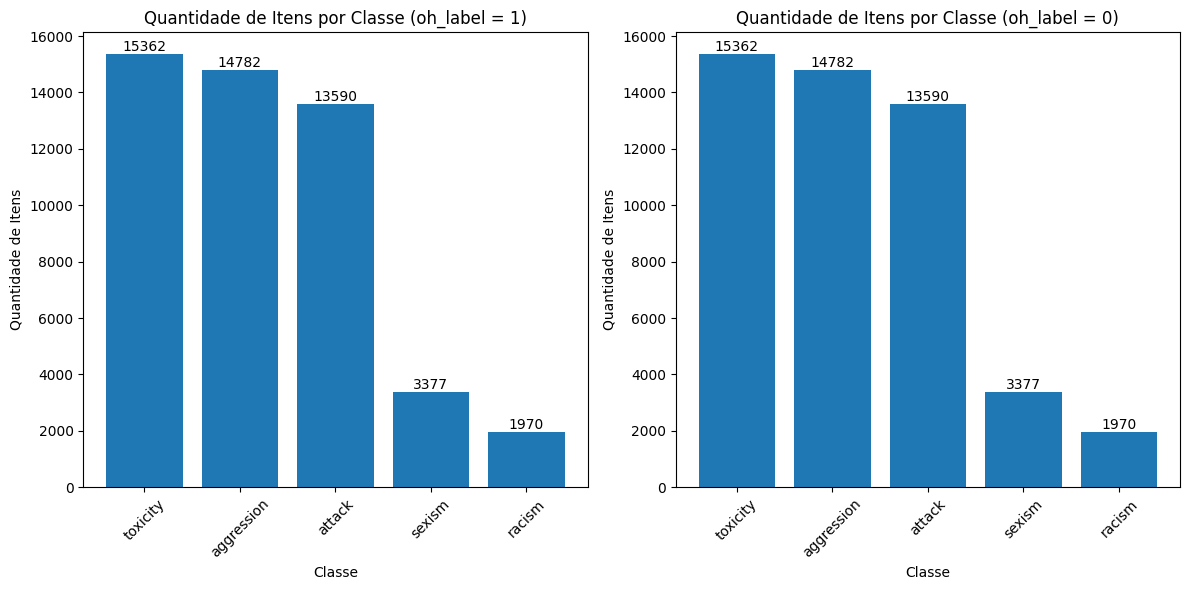

In [4]:
import pandas as pd

# Remover textos nulos ou sem valor
df_filtered = df_final.dropna(subset=['Text', 'oh_label'])

# Agrupar e contar a quantidade de itens por classe em cada DataFrame filtrado
grouped_counts = df_filtered.groupby(['oh_label', 'type_text_label']).size().reset_index(name='count')

# Filtrar apenas os grupos onde oh_label é igual a 1
filtro = grouped_counts['oh_label'] == 1
grouped_counts = grouped_counts.loc[filtro]

df_new = pd.DataFrame()

# Iterar sobre cada grupo
for group, count in grouped_counts.groupby(['oh_label', 'type_text_label']):
    # Obter o oh_label e type_text_label do grupo atual
    oh_label = group[0]
    type_text_label = group[1]
    
    filter_yes_bullying = (0, type_text_label)
    filter_not_bullying = (1, type_text_label)
    
    count_yes_bullying = count[count['type_text_label'] == type_text_label]['count'].values[0]
    count_not_bullying = count[count['type_text_label'] == type_text_label]['count'].values[0]
    
    group_yes_bullying = df_filtered[(df_filtered['oh_label'] == filter_yes_bullying[0]) & (df_filtered['type_text_label'] == filter_yes_bullying[1])].sample(n=count_yes_bullying, random_state=42)
    group_not_bullying = df_filtered[(df_filtered['oh_label'] == filter_not_bullying[0]) & (df_filtered['type_text_label'] == filter_not_bullying[1])].sample(n=count_not_bullying, random_state=42)
    
    df_new = pd.concat([df_new, group_yes_bullying])
    df_new = pd.concat([df_new, group_not_bullying])
    
plot_class_counts(df_new)

### Pré-processamento de Texto

1. Importamos as bibliotecas necessárias do NLTK, como `nltk`, `stopwords`, `word_tokenize`, `WordNetLemmatizer`, e `string`.
2. Realizamos o download dos recursos necessários do NLTK usando `nltk.download()`.
3. Definimos a função `preprocess_text` que recebe um texto como entrada e realiza as seguintes etapas de pré-processamento:
   - Tokenização do texto usando `word_tokenize`.
   - Remoção da pontuação dos tokens utilizando uma lista de pontuação fornecida pela biblioteca `string`.
   - Remoção de stopwords da língua inglesa usando `stopwords.words('english')`.
   - Lematização dos tokens usando `WordNetLemmatizer`.
   - União dos tokens pré-processados novamente em uma única string.
4. Criamos uma nova coluna chamada `preprocessed_text` no dataframe `df_new` para armazenar os textos pré-processados.
5. Inicializamos as variáveis `total_texts` e `processed_texts` para acompanhar o progresso do pré-processamento.
6. Utilizamos um loop `for` para iterar sobre cada linha do dataframe `df_new`.
7. Acessamos o texto original de cada linha.
8. Aplicamos a função `preprocess_text` ao texto para obter o texto pré-processado.
9. Atualizamos a coluna `preprocessed_text` da linha correspondente no dataframe `df_new` com o texto pré-processado usando `df_new.at[index, 'preprocessed_text'] = preprocessed_text`.
10. Atualizamos as variáveis `processed_texts` e `progress` para acompanhar o progresso do pré-processamento e exibimos uma mensagem de progresso.
11. Exibimos as primeiras linhas do dataframe `df_new` para verificar os textos pré-processados.

Esses passos resumidos descrevem o processo de pré-processamento de texto usando o NLTK. O pré-processamento inclui tokenização, remoção de pontuação, remoção de stopwords, lematização e união dos tokens em uma string. O pré-processamento é aplicado aos textos do dataframe `df_new` e o progresso é exibido durante o processamento.


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Função de pré-processamento
def preprocess_text(text):
    # Tokenização
    tokens = word_tokenize(text)
    # Remoção de pontuação
    tokens = [token for token in tokens if token not in string.punctuation]
    # Remoção de stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    # Lematização
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Unir tokens em uma string novamente
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Aplicar pré-processamento aos textos
df_new['preprocessed_text'] = ""

total_texts = len(df_new['Text'])
processed_texts = 0

for index, row in df_new.iterrows():
    text = row['Text']
    preprocessed_text = preprocess_text(text)
    df_new.at[index, 'preprocessed_text'] = preprocessed_text
    
    processed_texts += 1
    progress = (processed_texts / total_texts) * 100
    print(f"Progresso: {progress:.2f}% ({processed_texts}/{total_texts}) textos processados.")

df_new.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gerso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gerso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gerso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Progresso: 0.00% (1/98162) textos processados.
Progresso: 0.00% (2/98162) textos processados.
Progresso: 0.00% (3/98162) textos processados.
Progresso: 0.00% (4/98162) textos processados.
Progresso: 0.01% (5/98162) textos processados.
Progresso: 0.01% (6/98162) textos processados.
Progresso: 0.01% (7/98162) textos processados.
Progresso: 0.01% (8/98162) textos processados.
Progresso: 0.01% (9/98162) textos processados.
Progresso: 0.01% (10/98162) textos processados.
Progresso: 0.01% (11/98162) textos processados.
Progresso: 0.01% (12/98162) textos processados.
Progresso: 0.01% (13/98162) textos processados.
Progresso: 0.01% (14/98162) textos processados.
Progresso: 0.02% (15/98162) textos processados.
Progresso: 0.02% (16/98162) textos processados.
Progresso: 0.02% (17/98162) textos processados.
Progresso: 0.02% (18/98162) textos processados.
Progresso: 0.02% (19/98162) textos processados.
Progresso: 0.02% (20/98162) textos processados.
Progresso: 0.02% (21/98162) textos processados.
P

index                                               Text  ed_label_0  \
54825  54825    ==Serge Nigg== There is a link to this perso...         1.0   
91472  91472    == Is this horse tack? ==  Break out this ho...         0.9   
4154    4154  `   ==Bektashi== I suspect you start all your ...         0.5   
72763  72763    Unless the New York Times is going to retrac...         0.9   
36798  36798  `  ===Degree===  *Marshall thinks he did have ...         1.0   

       ed_label_1  oh_label  type_text type_text_label   id Annotation  \
54825         0.0       0.0          1      aggression  NaN        NaN   
91472         0.1       0.0          1      aggression  NaN        NaN   
4154          0.5       0.0          1      aggression  NaN        NaN   
72763         0.1       0.0          1      aggression  NaN        NaN   
36798         0.0       0.0          1      aggression  NaN        NaN   

                                       preprocessed_text  
54825  ==Serge Nigg== link person 's death November 1...  
91472  == horse tack == Break horse tack definition book  
4154   RT RemyNorth QuestionsForMen mostly ignorant a...  
72763  Unless New York Times going retract statement ...  
36798  ===Degree=== Marshall think degree Beza seems ...

### Separação e Balanceamento dos Dados

1. Remover os textos nulos ou sem valor do dataframe `df_new` nas colunas `preprocessed_text`, `oh_label` e `type_text_label` e armazenar o resultado no dataframe `df_filtered`.
2. Separar os dados em conjuntos de teste e treinamento usando a função `train_test_split` do scikit-learn. O conjunto de teste representa 20% dos dados e é estratificado com base nas colunas `oh_label` e `type_text_label`. O conjunto de treinamento contém os 80% restantes dos dados.
3. Calcular a quantidade de `oh_label` e `type_text_label` presente no grupo de teste usando o método `groupby` e armazenar as contagens no dataframe `count_test`.
4. Separar os dados de validação do conjunto de treinamento usando novamente a função `train_test_split`. O conjunto de validação representa 12.5% dos dados e também é estratificado com base nas colunas `oh_label` e `type_text_label`. O conjunto de treinamento contém os 87.5% restantes dos dados.
5. Criar uma cópia das contagens de `oh_label` e `type_text_label` do grupo de teste e armazená-las no dataframe `count_validation`.
6. Definir a função `filter_data` para filtrar os dados com base em uma combinação de `oh_label` e `type_text_label` específicos.
7. Criar o dataframe `df_test_balanced` para armazenar os dados de teste balanceados. Para cada grupo no dataframe `count_test`, selecionar a quantidade mínima entre a contagem do grupo e o tamanho do grupo filtrado usando a função `filter_data`. Em seguida, amostrar aleatoriamente o número selecionado de dados de cada grupo e concatená-los ao dataframe `df_test_balanced`.
8. Criar o dataframe `df_validation_balanced` para armazenar os dados de validação balanceados de maneira semelhante ao passo anterior.
9. Imprimir as informações dos grupos, incluindo o tamanho do grupo de teste, a visualização da quantidade de itens por classe no grupo de teste, o tamanho do grupo de validação, a visualização da quantidade de itens por classe no grupo de validação, o tamanho do grupo de treinamento e a visualização da quantidade de itens por classe no grupo de treinamento.


Tamanho do grupo de teste: 78529


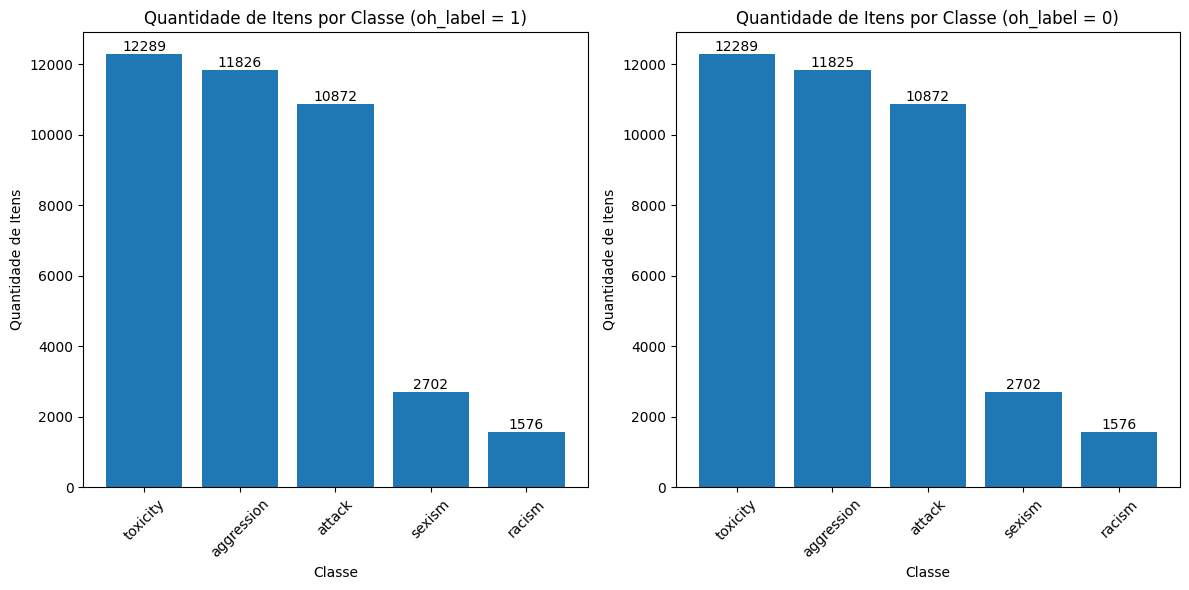

Tamanho do grupo de validação: 17178


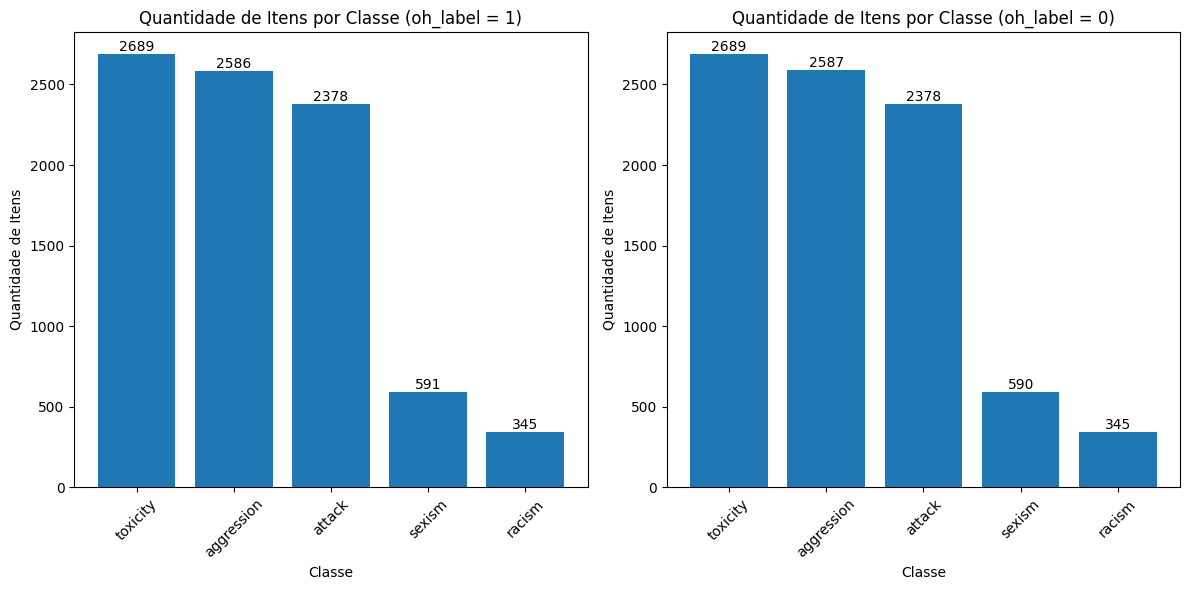

Tamanho do grupo de treino: 2455


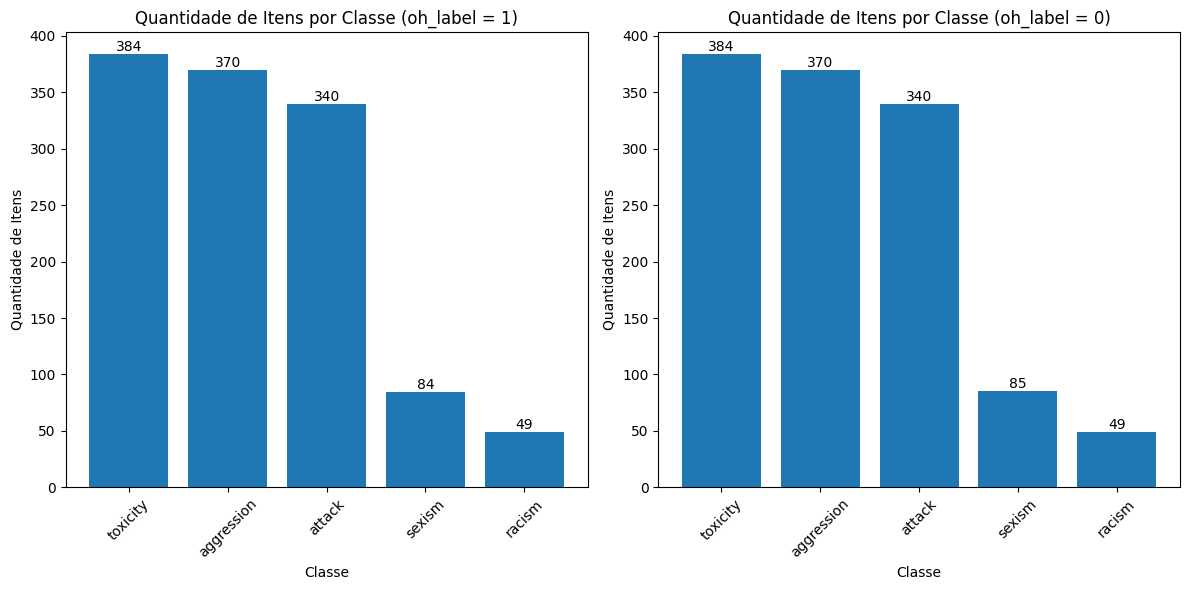

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Remover textos nulos ou sem valor
df_filtered = df_new.dropna(subset=['preprocessed_text', 'oh_label', 'type_text_label'])

# Separar os dados de teste
df_test, df_train = train_test_split(df_filtered, test_size=0.20, stratify=df_filtered[['oh_label', 'type_text_label']], random_state=42)

# Obter a quantidade de oh_label e type_text_label no grupo de teste
count_test = df_test.groupby(['oh_label', 'type_text_label']).size().reset_index(name='count')

# Separar os dados de validação
df_validation, df_train = train_test_split(df_train, test_size=0.125, stratify=df_train[['oh_label', 'type_text_label']], random_state=42)

# Combinar a quantidade de oh_label e type_text_label no grupo de teste e de validação
count_validation = count_test.copy()

# Função para filtrar os dados por oh_label e type_text_label
def filter_data(df, oh_label, type_text_label):
    return df[(df['oh_label'] == oh_label) & (df['type_text_label'] == type_text_label)]

# Criar o DataFrame de teste com a mesma quantidade de oh_label e type_text_label
df_test_balanced = pd.DataFrame()
for _, row in count_test.iterrows():
    oh_label = row['oh_label']
    type_text_label = row['type_text_label']
    count = min(row['count'], len(filter_data(df_test, oh_label, type_text_label)))
    group_data = filter_data(df_test, oh_label, type_text_label).sample(n=count, random_state=42)
    df_test_balanced = pd.concat([df_test_balanced, group_data])

# Criar o DataFrame de validação com a mesma quantidade de oh_label e type_text_label
df_validation_balanced = pd.DataFrame()
for _, row in count_validation.iterrows():
    oh_label = row['oh_label']
    type_text_label = row['type_text_label']
    count = min(row['count'], len(filter_data(df_validation, oh_label, type_text_label)))
    group_data = filter_data(df_validation, oh_label, type_text_label).sample(n=count, random_state=42)
    df_validation_balanced = pd.concat([df_validation_balanced, group_data])

# Imprimir as informações dos grupos
print("Tamanho do grupo de teste:", len(df_test_balanced))
plot_class_counts(df_test_balanced)
print("Tamanho do grupo de validação:", len(df_validation_balanced))
plot_class_counts(df_validation_balanced)
print("Tamanho do grupo de treino:", len(df_train))
plot_class_counts(df_train)

### Vetorização dos Dados Textuais

1. Definimos a função `vectorize_text` que utiliza o TfidfVectorizer para vetorizar os dados textuais.
2. Convertemos a coluna 'oh_label' dos dataframes `df_train`, `df_test` e `df_validation` para o tipo 'str' para garantir compatibilidade com o vetorizador.
3. Utilizamos a função `vectorize_text` para vetorizar os dados de texto do dataframe de treinamento `df_train['preprocessed_text']`. O resultado é armazenado em `X_train_vec`, que contém os dados vetorizados, e em `vectorizer`, que é o vetorizador treinado.
4. Definimos `y_train` como a coluna 'oh_label' do dataframe de treinamento `df_train['oh_label']`, que representa os rótulos das classes.
5. Utilizamos o vetorizador treinado para vetorizar os dados de texto do dataframe de teste `df_test['preprocessed_text']`. O resultado é armazenado em `X_test_vec`.
6. Definimos `y_test` como a coluna 'oh_label' do dataframe de teste `df_test['oh_label']`.
7. Utilizamos o vetorizador treinado para vetorizar os dados de texto do dataframe de validação `df_validation['preprocessed_text']`. O resultado é armazenado em `X_validation_vec`.
8. Definimos `y_validation` como a coluna 'oh_label' do dataframe de validação `df_validation['oh_label']`.
9. Imprimimos exemplos de vetorização dos dataframes de treinamento, teste e validação para verificar o resultado.

Esses passos resumidos descrevem o processo de vetorização dos dados textuais usando o TfidfVectorizer. Os dados de texto são convertidos em representações numéricas usando o TF-IDF, permitindo a utilização desses dados em algoritmos de aprendizado de máquina. O resultado são os conjuntos de dados vetorizados `X_train_vec`, `X_test_vec` e `X_validation_vec`, juntamente com os respectivos rótulos das classes `y_train`, `y_test` e `y_validation`.


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_text(text_data):
    # Criar o vetorizador TF-IDF
    vectorizer = TfidfVectorizer()
    
    # Ajustar o vetorizador e transformar os dados
    X_vec = vectorizer.fit_transform(text_data)
    
    return X_vec, vectorizer

# Converter a coluna 'oh_label' para o tipo str
df_train['oh_label'] = df_train['oh_label'].astype(str)
df_test['oh_label'] = df_test['oh_label'].astype(str)
df_validation['oh_label'] = df_validation['oh_label'].astype(str)

# Vetorizar os dados de treinamento
X_train_vec, vectorizer = vectorize_text(df_train['preprocessed_text'])
y_train = df_train['oh_label']

# Vetorizar os dados de teste
X_test_vec = vectorizer.transform(df_test['preprocessed_text'])
y_test = df_test['oh_label']

# Vetorizar os dados de validação
X_validation_vec = vectorizer.transform(df_validation['preprocessed_text'])
y_validation = df_validation['oh_label']



# Verificar o resultado
print("Exemplo de vetorização do dataframe de treino:")
print(df_train[['preprocessed_text', 'oh_label']].head())

print("Exemplo de vetorização do dataframe de teste:")
print(df_test[['preprocessed_text', 'oh_label']].head())

print("Exemplo de vetorização do dataframe de validação:")
print(df_validation[['preprocessed_text', 'oh_label']].head())

Exemplo de vetorização do dataframe de treino:
                                        preprocessed_text oh_label
56982                                        think fine •      0.0
66410                OK. wrong add native name wrong best      0.0
109722  Quit bitching tattletale 'm trolling 's legit ...      1.0
141360  == == fuck fucking say little bitch ’ know gra...      1.0
93526   == Merging Lewy neurites == section discus whe...      0.0
Exemplo de vetorização do dataframe de teste:
                                        preprocessed_text oh_label
5194    agree 've merged however n't see List Mormons ...      1.0
59207                                   isolated incident      1.0
115988            Hm wo n't let move 'm certainly blocked      0.0
67958                          say faggot 're talkin shit      1.0
92524   ==NO ONE APPARENTLY EDIT KRISTIAN DIGBY PAGE E...      1.0
Exemplo de vetorização do dataframe de validação:
                                        preprocessed_

### Treinamento e Avaliação do Modelo Naive Bayes

1. Vetorizamos os dados de treinamento usando o TfidfVectorizer e armazenamos os resultados em `X_train_vec`.
2. Vetorizamos os dados de teste e validação utilizando o vetorizador treinado e armazenamos os resultados em `X_test_vec` e `X_validation_vec`, respectivamente.
3. Convertemos os rótulos das classes (`y_train`, `y_test` e `y_validation`) para o tipo numérico usando o LabelEncoder.
4. Criamos uma instância do classificador Naive Bayes, especificamente o MultinomialNB.
5. Treinamos o modelo Naive Bayes utilizando os dados de treinamento vetorizados (`X_train_vec`) e os rótulos de treinamento numéricos (`y_train`).
6. Realizamos previsões nos dados de teste vetorizados (`X_test_vec`) utilizando o modelo treinado e armazenamos as previsões em `y_pred_test`.
7. Calculamos a acurácia nos dados de teste comparando as previsões (`y_pred_test`) com os rótulos de teste numéricos (`y_test`).
8. Realizamos previsões nos dados de validação vetorizados (`X_validation_vec`) utilizando o modelo treinado e armazenamos as previsões em `y_pred_validation`.
9. Calculamos a acurácia nos dados de validação comparando as previsões (`y_pred_validation`) com os rótulos de validação numéricos (`y_validation`).

O modelo Naive Bayes é utilizado para classificar os dados textuais. A vetorização dos dados textuais e a conversão dos rótulos das classes para o formato numérico são etapas necessárias para o treinamento e avaliação do modelo. A acurácia nos dados de teste e validação fornece uma medida da qualidade e desempenho do modelo na classificação dos textos.


In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

def naive_bayes_model(X_train, y_train, X_test, y_test, X_validation, y_validation):
    # Vetorizar os dados de treinamento
    vectorizer = TfidfVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)

    # Vetorizar os dados de teste e validação
    X_test_vec = vectorizer.transform(X_test)
    X_validation_vec = vectorizer.transform(X_validation)

    # Converter os rótulos para o tipo numérico
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)
    y_validation = label_encoder.transform(y_validation)

    # Criar uma instância do classificador Naive Bayes
    nb_classifier = MultinomialNB()

    # Treinar o modelo com os dados de treinamento
    nb_classifier.fit(X_train_vec, y_train)

    # Fazer previsões nos dados de teste
    y_pred_test = nb_classifier.predict(X_test_vec)

    # Calcular a acurácia nos dados de teste
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print("Acurácia nos dados de teste:", accuracy_test)

    # Fazer previsões nos dados de validação
    y_pred_validation = nb_classifier.predict(X_validation_vec)

    # Calcular a acurácia nos dados de validação
    accuracy_validation = accuracy_score(y_validation, y_pred_validation)
    print("Acurácia nos dados de validação:", accuracy_validation)

    return nb_classifier, accuracy_test

### Treinamento e Avaliação do Modelo SVM

1. Vetorizamos os dados de treinamento usando o TfidfVectorizer e armazenamos os resultados em `X_train_vec`.
2. Vetorizamos os dados de teste e validação utilizando o vetorizador treinado e armazenamos os resultados em `X_test_vec` e `X_validation_vec`, respectivamente.
3. Convertemos os rótulos das classes (`y_train`, `y_test` e `y_validation`) para o tipo numérico usando o LabelEncoder.
4. Criamos uma instância do classificador SVM (`SVC`) com a opção `probability=True` para possibilitar a obtenção das probabilidades de classificação.
5. Definimos uma grade de hiperparâmetros para serem testados. Neste caso, os hiperparâmetros são `C` (parâmetro de regularização), `kernel` (tipo de kernel) e `gamma` (coeficiente do kernel).
6. Utilizamos a função `GridSearchCV` para realizar uma busca em grade com validação cruzada (CV) a fim de encontrar os melhores hiperparâmetros para o modelo SVM. A busca é realizada com base no classificador SVM e na grade de hiperparâmetros definida.
7. Ajustamos a busca em grade aos dados de treinamento vetorizados (`X_train_vec`) e aos rótulos de treinamento numéricos (`y_train`).
8. Obtemos o melhor modelo encontrado pela busca em grade, juntamente com os melhores hiperparâmetros.
9. Realizamos a validação cruzada no melhor modelo encontrado utilizando a função `cross_val_score`. Neste caso, utilizamos uma validação cruzada com 5 folds.
10. Calculamos a média das acurácias obtidas em cada fold da validação cruzada e a armazenamos em `average_accuracy`.
11. Imprimimos a média das acurácias da validação cruzada para avaliar o desempenho geral do modelo SVM.
12. Fazemos previsões nos dados de teste vetorizados (`X_test_vec`) utilizando o melhor modelo encontrado e armazenamos as previsões em `y_pred_test`.
13. Calculamos a acurácia nos dados de teste comparando as previsões (`y_pred_test`) com os rótulos de teste numéricos (`y_test`).
14. Imprimimos a acurácia nos dados de teste para avaliar o desempenho do modelo SVM nos dados não vistos.
15. Fazemos previsões nos dados de validação vetorizados (`X_validation_vec`) utilizando o melhor modelo encontrado e armazenamos as previsões em `y_pred_validation`.
16. Calculamos a acurácia nos dados de validação comparando as previsões (`y_pred_validation`) com os rótulos de validação numéricos (`y_validation`).
17. Imprimimos a acurácia nos dados de validação para avaliar o desempenho do modelo SVM nos dados de validação.
18. Retornamos o melhor modelo SVM encontrado e a acurácia nos dados de teste.

O modelo SVM é treinado e avaliado com base nos dados vetorizados. A busca em grade com validação cruzada permite encontrar os melhores hiperparâmetros para o modelo, otimizando seu desempenho. A acurácia média da validação cruzada e a acurácia nos dados de teste e validação são utilizadas como métricas de avaliação do modelo SVM.


In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

def svm_model(X_train, y_train, X_test, y_test, X_validation, y_validation):
    # Vetorizar os dados de treinamento
    vectorizer = TfidfVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)

    # Vetorizar os dados de teste e validação
    X_test_vec = vectorizer.transform(X_test)
    X_validation_vec = vectorizer.transform(X_validation)

    # Converter os rótulos para o tipo numérico
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)
    y_validation = label_encoder.transform(y_validation)

    # Criar uma instância do classificador SVM
    svm_classifier = SVC(probability=True)

    # Definir os hiperparâmetros a serem testados
    hyperparameters = {'C': [0.1, 1, 10],
                       'kernel': ['linear', 'rbf'],
                       'gamma': ['scale', 'auto']}

    # Realizar busca em grade com validação cruzada para encontrar os melhores hiperparâmetros
    grid_search = GridSearchCV(svm_classifier, hyperparameters, cv=5)
    grid_search.fit(X_train_vec, y_train)

    # Obter o melhor modelo com os melhores hiperparâmetros encontrados
    best_svm_classifier = grid_search.best_estimator_

    # Realizar validação cruzada no melhor modelo
    cv_scores = cross_val_score(best_svm_classifier, X_train_vec, y_train, cv=5)

    # Calcular a média das acurácias obtidas em cada fold
    average_accuracy = cv_scores.mean()

    # Imprimir a média das acurácias
    print("Acurácia média da validação cruzada:", average_accuracy)

    # Fazer previsões nos dados de teste
    y_pred_test = best_svm_classifier.predict(X_test_vec)

    # Calcular a acurácia nos dados de teste
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print("Acurácia nos dados de teste:", accuracy_test)

    # Fazer previsões nos dados de validação
    y_pred_validation = best_svm_classifier.predict(X_validation_vec)

    # Calcular a acurácia nos dados de validação
    accuracy_validation = accuracy_score(y_validation, y_pred_validation)
    print("Acurácia nos dados de validação:", accuracy_validation)

    return best_svm_classifier, accuracy_test

## Resumo e Explicação dos Passos Executados

### Treinamento e Avaliação do Modelo RNN (Rede Neural Recorrente)

1. Vetorizamos os dados de treinamento utilizando o TfidfVectorizer e armazenamos os resultados em `X_train_vec`.
2. Vetorizamos os dados de teste e validação utilizando o vetorizador treinado e armazenamos os resultados em `X_test_vec` e `X_validation_vec`, respectivamente.
3. Convertemos os rótulos das classes (`y_train`, `y_test` e `y_validation`) para o tipo numérico utilizando o LabelEncoder.
4. Utilizamos o Tokenizer do Keras para converter as sequências de texto em sequências de índices.
5. Padronizamos as sequências para terem o mesmo comprimento definido como `max_len` (100 no exemplo).
6. Criamos o modelo de RNN (Rede Neural Recorrente) utilizando a Sequential API do Keras. O modelo consiste em uma camada de Embedding, uma camada LSTM e uma camada Dense de saída.
7. Compilamos o modelo com a função de perda `binary_crossentropy`, o otimizador `adam` e a métrica `accuracy`.
8. Treinamos o modelo utilizando os dados de treinamento vetorizados (`X_train`) e os rótulos de treinamento numéricos (`y_train`) por 5 épocas, com tamanho de lote (batch size) igual a 64.
9. Fazemos previsões nos dados de teste utilizando o modelo treinado e armazenamos as previsões em `y_pred_test`.
10. Arredondamos as previsões (`y_pred_test`) para obter rótulos binários.
11. Calculamos a acurácia nos dados de teste comparando os rótulos binários (`y_pred_test_labels`) com os rótulos de teste numéricos (`y_test`).
12. Imprimimos a acurácia nos dados de teste para avaliar o desempenho do modelo RNN nos dados não vistos.
13. Fazemos previsões nos dados de treinamento utilizando o modelo treinado e armazenamos as previsões em `y_pred_train`.
14. Arredondamos as previsões (`y_pred_train`) para obter rótulos binários.
15. Calculamos a acurácia nos dados de treinamento comparando os rótulos binários (`y_pred_train_labels`) com os rótulos de treinamento numéricos (`y_train`).
16. Imprimimos a acurácia nos dados de treinamento para avaliar o desempenho do modelo RNN nos dados utilizados para treinamento.
17. Fazemos previsões nos dados de validação utilizando o modelo treinado e armazenamos as previsões em `y_pred_validation`.
18. Arredondamos as previsões (`y_pred_validation`) para obter rótulos binários.
19. Calculamos a acurácia nos dados de validação comparando os rótulos binários (`y_pred_validation_labels`) com os rótulos de validação numéricos (`y_validation`).
20. Imprimimos a acurácia nos dados de validação para avaliar o desempenho do modelo RNN nos dados de validação.
21. Exportamos o modelo, vetorizador, codificador de rótulos e Tokenizer utilizando o módulo pickle para uso posterior.

O modelo RNN é treinado e avaliado com base nos dados vetorizados e nas sequências de índices padronizadas. A acurácia nos dados de teste, treinamento e validação é utilizada para avaliar o desempenho do modelo RNN na classificação de textos.


In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

def rnn_model(X_train, y_train, X_test, y_test, X_validation, y_validation):
    # Vetorizar os dados de treinamento
    vectorizer = TfidfVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    
    # Vetorizar os dados de teste e validação
    X_test_vec = vectorizer.transform(X_test)
    X_validation_vec = vectorizer.transform(X_validation)

    # Converter os rótulos para o tipo numérico
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)
    y_validation = label_encoder.transform(y_validation)

    # Converter as sequências de texto em sequências de índices
    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(X_train)

    sequences_train = tokenizer.texts_to_sequences(X_train)
    sequences_test = tokenizer.texts_to_sequences(X_test)
    sequences_validation = tokenizer.texts_to_sequences(X_validation)

    # Padronizar as sequências para ter o mesmo comprimento
    max_len = 100  # comprimento máximo das sequências
    X_train = pad_sequences(sequences_train, maxlen=max_len)
    X_test = pad_sequences(sequences_test, maxlen=max_len)
    X_validation = pad_sequences(sequences_validation, maxlen=max_len)
    
    # Criar o modelo de RNN
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
    model.add(LSTM(units=128))
    model.add(Dense(units=1, activation='sigmoid'))

    # Compilar o modelo
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Treinar o modelo
    model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=5, batch_size=64)

    # Fazer previsões nos dados de teste
    y_pred_test = model.predict(X_test)
    y_pred_test_labels = np.round(y_pred_test).flatten()

    # Calcular a acurácia nos dados de teste
    accuracy_test = accuracy_score(y_test, y_pred_test_labels)
    print("Acurácia nos dados de teste:", accuracy_test)

    # Fazer previsões nos dados de treinamento
    y_pred_train = model.predict(X_train)
    y_pred_train_labels = np.round(y_pred_train).flatten()

    # Calcular a acurácia nos dados de treinamento
    accuracy_train = accuracy_score(y_train, y_pred_train_labels)
    print("Acurácia nos dados de treinamento:", accuracy_train)

    # Fazer previsões nos dados de validação
    y_pred_validation = model.predict(X_validation)
    y_pred_validation_labels = np.round(y_pred_validation).flatten()

    # Calcular a acurácia nos dados de validação
    accuracy_validation = accuracy_score(y_validation, y_pred_validation_labels)
    print("Acurácia nos dados de validação:", accuracy_validation)
    
    # Exportar o modelo, vetorizador e outros pré-processadores usando pickle
    with open('rnn.pkl', 'wb') as file:
        pickle.dump((model, vectorizer, label_encoder, tokenizer, max_len), file)

    return model, accuracy_test

### Execução e Comparação de Modelos

1. Definimos os dados de treinamento, teste e validação (`X_train`, `y_train`, `X_test`, `y_test`, `X_validation`, `y_validation`), que são provenientes do pré-processamento dos textos.
2. Executamos três modelos de aprendizado de máquina: RNN (Rede Neural Recorrente), SVM (Support Vector Machine) e Naive Bayes.
3. Para cada modelo, utilizamos as funções correspondentes (`rnn_model`, `svm_model`, `naive_bayes_model`) para treinar e avaliar o modelo com os dados de treinamento, teste e validação.
4. Cada função do modelo realiza as seguintes etapas:
   - Vetoriza os dados de texto usando o TfidfVectorizer.
   - Converte os rótulos para o tipo numérico usando o LabelEncoder.
   - Executa o pré-processamento específico do modelo (por exemplo, Tokenizer e padding para RNN).
   - Cria e compila o modelo com a arquitetura adequada.
   - Treina o modelo com os dados de treinamento.
   - Faz previsões nos dados de teste e validação.
   - Calcula a acurácia nos dados de teste e validação.
   - Retorna o modelo treinado e a acurácia nos dados de teste.
5. Armazenamos as acurácias obtidas para cada modelo em um dicionário (`model_accuracies`).
6. Identificamos o melhor modelo com base na maior acurácia (`best_model`).
7. Imprimimos o nome do melhor modelo encontrado.

Os modelos RNN, SVM e Naive Bayes são treinados e avaliados com base nos dados de texto vetorizados e rótulos numéricos. A acurácia é utilizada como métrica para comparar e selecionar o melhor modelo entre eles.


In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

# Dados de exemplo
X_train = df_train['preprocessed_text']
y_train = df_train['oh_label']
X_test = df_test['preprocessed_text']
y_test = df_test['oh_label']
X_validation = df_validation['preprocessed_text']
y_validation = df_validation['oh_label']

# Executar os modelos
rnn_model, rnn_accuracy = rnn_model(X_train, y_train, X_test, y_test, X_validation, y_validation)
svm_model, svm_accuracy = svm_model(X_train, y_train, X_test, y_test, X_validation, y_validation)
nb_model, nb_accuracy = naive_bayes_model(X_train, y_train, X_test, y_test, X_validation, y_validation)

# Comparar as acurácias dos modelos
model_accuracies = {
    'RNN': rnn_accuracy,
    'SVM': svm_accuracy,
    'Naive Bayes': nb_accuracy
}

best_model = max(model_accuracies, key=model_accuracies.get)
print("Melhor modelo:", best_model)

Epoch 1/5
39/39 [==============================] - 14s 326ms/step - loss: 0.6659 - accuracy: 0.6086 - val_loss: 0.5986 - val_accuracy: 0.6993
Epoch 2/5
39/39 [==============================] - 12s 315ms/step - loss: 0.4747 - accuracy: 0.8314 - val_loss: 0.5727 - val_accuracy: 0.7099
Epoch 3/5
39/39 [==============================] - 12s 322ms/step - loss: 0.3019 - accuracy: 0.9018 - val_loss: 0.6161 - val_accuracy: 0.7182
Epoch 4/5
39/39 [==============================] - 12s 319ms/step - loss: 0.1474 - accuracy: 0.9585 - val_loss: 0.7314 - val_accuracy: 0.7253
Epoch 5/5
2455/2455 [==============================] - 41s 17ms/step
Acurácia nos dados de teste: 0.7148059952374282
77/77 [==============================] - 1s 16ms/step
Acurácia nos dados de treinamento: 0.9890020366598778
537/537 [==============================] - 9s 16ms/step
Acurácia nos dados de validação: 0.7137617883339155
Acurácia média da validação cruzada: 0.7723014256619145
Acurácia nos dados de teste: 0.753988972226

### Salvando Modelos e Pré-processadores em Arquivos Pickle

1. Utilizamos a biblioteca pickle para salvar os modelos e pré-processadores em arquivos pickle para uso posterior.
2. Utilizamos a função `pickle.dump()` para salvar cada objeto em um arquivo pickle.
3. Salvamos os seguintes objetos:
   - Modelo RNN (`rnn_model`) em um arquivo chamado "rnn_model.pkl".
   - Modelo SVM (`svm_model`) em um arquivo chamado "svm_model.pkl".
   - Modelo Naive Bayes (`nb_model`) em um arquivo chamado "nb_model.pkl".
   - Vetorizador (`vectorizer`) em um arquivo chamado "vectorizer.pkl".

Esses arquivos pickle podem ser carregados posteriormente para reutilização dos modelos e pré-processadores, evitando a necessidade de treiná-los novamente.


In [13]:
import pickle

# Salvar modelo RNN em um arquivo pickle
with open('rnn_model.pkl', 'wb') as file:
    pickle.dump(rnn_model, file)

# Salvar modelo SVM em um arquivo pickle
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

# Salvar modelo Naive Bayes em um arquivo pickle
with open('nb_model.pkl', 'wb') as file:
    pickle.dump(nb_model, file)
    
# Salvar o vetorizador em um arquivo pickle
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

### Gráfico de Comparação dos Modelos

1. Utilizamos a biblioteca matplotlib para criar um gráfico de barras comparando as acurácias dos diferentes modelos.
2. Utilizamos a função `plt.bar()` para criar as barras do gráfico.
3. Passamos como argumentos para a função `plt.bar()` os nomes dos modelos (`model_accuracies.keys()`) como rótulos no eixo x e as acurácias dos modelos (`model_accuracies.values()`) como alturas das barras.
4. Utilizamos as funções `plt.xlabel()`, `plt.ylabel()` e `plt.title()` para adicionar rótulos aos eixos x e y e um título ao gráfico, respectivamente.
5. Utilizamos a função `plt.show()` para exibir o gráfico.

O gráfico de barras permite visualizar e comparar as acurácias dos modelos RNN, SVM e Naive Bayes de forma intuitiva.


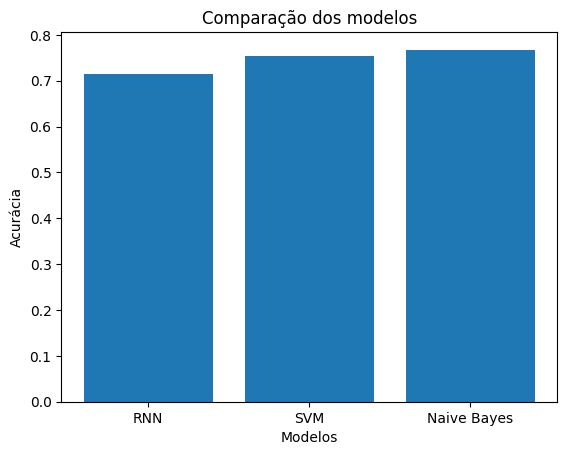

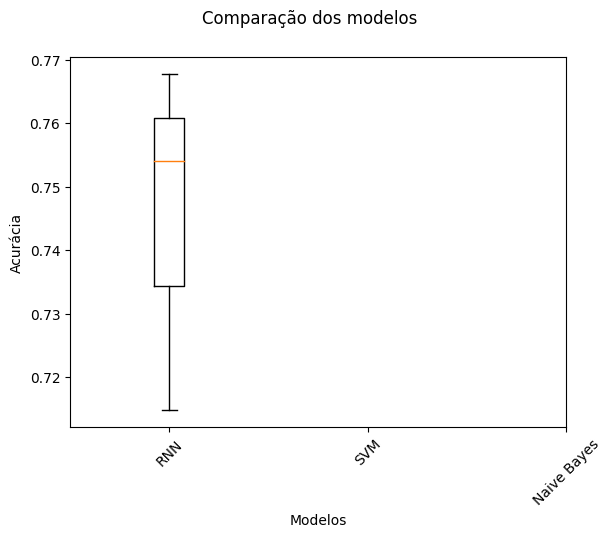

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Gráfico de comparação dos algoritmos
plt.figure()
plt.bar(model_accuracies.keys(), model_accuracies.values())
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação dos modelos')
plt.show()